# Sklearn 简介

## sklearn 的数据表示

利用数据表的形式，表示数据

### 数据表
每一行代表数据集中的每个样本，列表示每个样本的相关特征

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 特征矩阵

每行是一个sample，每列是一个feature，整个就叫做特征矩阵(feature_matrix)

In [2]:
n_samples,n_features = iris.shape
n_samples,n_features

(150, 5)

sklearn支持 numpy的数组和 pandas的DataFrame作为特征矩阵传入，同时也支持 **SciPy的稀疏矩阵**，作为特征矩阵传入，仅仅是不同的数据结构而已。

### 目标数组

通常是一个一维数组，y，长度就是n_samples

In [3]:
y = iris['species']
n_samples = len(y)
n_samples

150

y 其实也可以看做是其中一个特征列，只不过在分析的时候我们把这个特征看作是一个因变量，另外的看作是自变量  
在确定了目标数组之后，就可以尝试对数据进行可视化

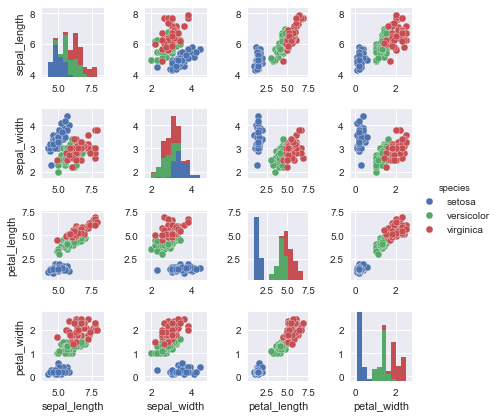

In [4]:
# 对数据进行可视化
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)

将数据切分成X和y

In [5]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Sklearn 的评估器API（Estimator）

* 统一性
* 内省
    * 所有参数值都是公共属性
* 限制对象层级
    * 只有算法可以用Python类表示，数据集都用Numpy数组，pandas DataFrame, Scipy 系数矩阵表示，参数名称用标准的Python字符串表示
* 函数组合
    * 许多机器学习任务都可以用一串基本算法实现，Sklearn尽力支持这种可能
* 明智的默认值
    * 预先定义适当的默认值

常用步骤
* 选择适当的评估器类，模型类
* 配置模型的超参数，用合适的数值对模型类进行实例化
* 整理数据，获得特征矩阵和目标数组
* 调用实例的 fit() 进行拟合
* 对新数据应用模型：
    * 有监督，调用 predict()
    * 无监督，调用 transform() 或者 predict()

### 示例：简单线性回归

In [7]:
import matplotlib.pyplot as plt
import numpy as np

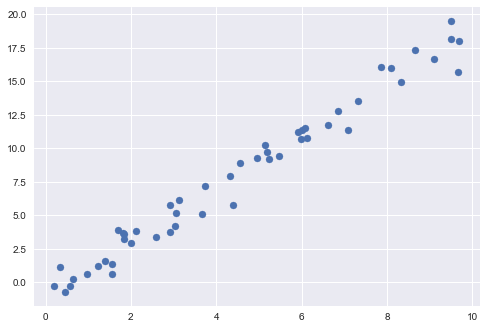

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression
# 超参数配置实例化
# eg: 是否要截距，是否要归一化，是否要预处理，正则化……
model = LinearRegression(fit_intercept = True)
model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

以上仅仅是上传了超参数，还没有将模型应用数据

In [10]:
# 数据整理
X = x[:,np.newaxis]
X.shape

(50, 1)

In [11]:
# 应用数据
model.fit(X,y)

/Users/vodka/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
model.coef_,model.intercept_

(array([ 1.9776566]), -0.90331072553111458)

sklearn 不提供模型参数意义上的讨论，如果需要更详细相关的讨论，学习 statsmodel库更有效，偏统计范畴，不太机器学习

In [13]:
# 预测数据
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

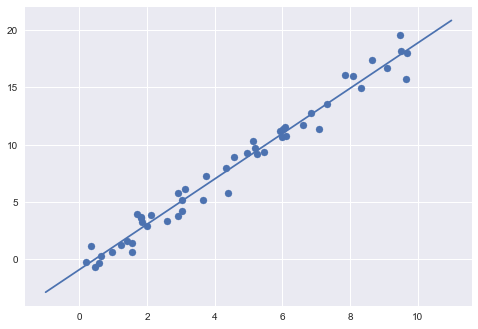

In [14]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

### 有监督示例：鸢尾花数据分类

利用高斯朴素贝叶斯的方法完成这个任务：就是将每类样本每个特征出现的方式假设为高斯分布，由此区分出三个类别  
高斯分布不需要设定超参数，所以比较方便作为初步分类的手段

In [15]:
# 切分数据集
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,y_test, = train_test_split(X_iris,y_iris,random_state = 1)

/Users/vodka/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [17]:
# 验证准确性
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.97368421052631582

### 无监督实例： 鸢尾花数据降维

对数据进行降维，能够更方便的对数据进行可视化  
降维的本质是找到一个可以保留数据本质特征的低维矩阵来表示高维数据  
在这里用PCA降维法

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

In [19]:
X_2D # 是一个array

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

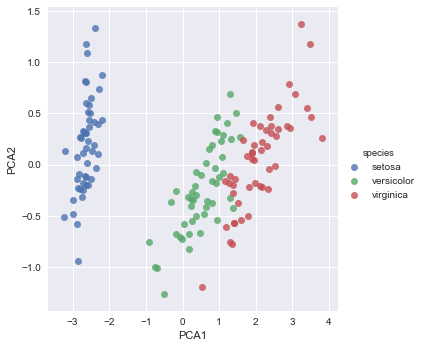

In [20]:
# 利用sns 画出结果
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue = 'species', data = iris, fit_reg = False)

### 无监督学习实例： 鸢尾花数据聚类

In [21]:
# 高斯混合模型 GMM
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3,
           covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

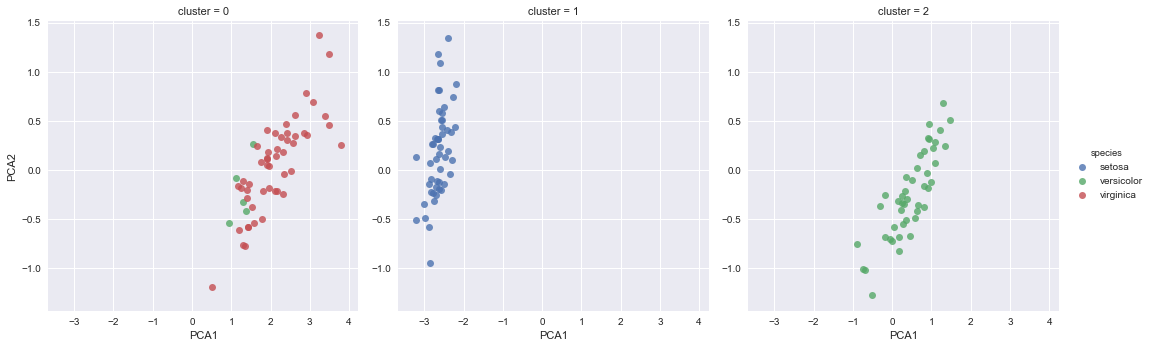

In [22]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2",data = iris,hue='species',col = 'cluster', fit_reg = False)

分类效果显著

## 应用：手写数字探索

用sklearn中自带的手写数字数据集

### 数据准备

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

一共 1797 张图，每张图 8*8像素，可视化前100张

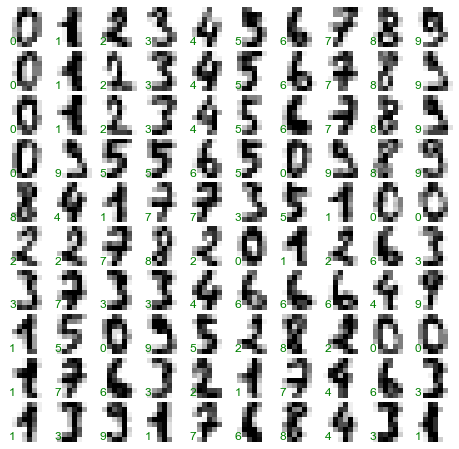

In [24]:
fig,axes = plt.subplots(10,10,figsize = (8,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
    transform=ax.transAxes, color = 'green')

In [25]:
X = digits.data
X.shape

(1797, 64)

In [26]:
y = digits.target
y.shape

(1797,)

### 降维

对具有64维参数空间的样本进行可视化是比较困难的，但是可以借助无监督学习方法将维度降低到二维  
这次可以尝试 Isomap 算法，一种基于流形学习的降维

In [27]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

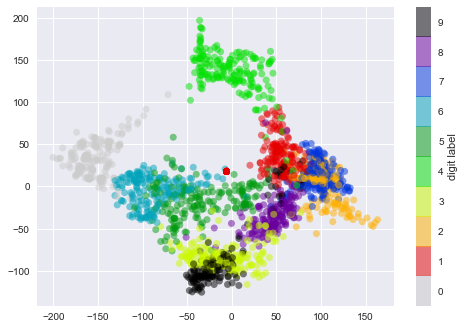

In [28]:
plt.scatter(data_projected[:,0],data_projected[:,1],c = digits.target,
           edgecolor='none',alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral_r',10))
plt.colorbar(label='digit label',ticks = range(10))
plt.clim(-0.5,9.5)

从上图可以看出来，大部分还是可以区分清楚的，说明用一种比较简单的有监督算法，应该就可以完成任务

### 完成分类

用高斯朴素贝叶斯来拟合:
* 对于相同一个数字，某个像素点是否着色，可一看做是一个高斯分布（手写）

In [29]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [30]:
# 准确性
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.83333333333333337

Text(125.71,0.5,'true value')

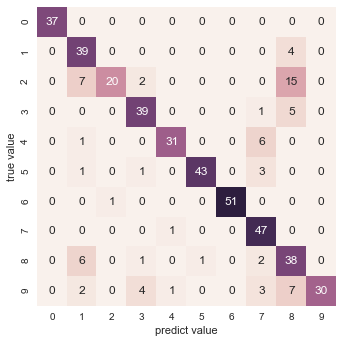

In [31]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predict value')
plt.ylabel('true value')

可以看到2比较容易被误判成8

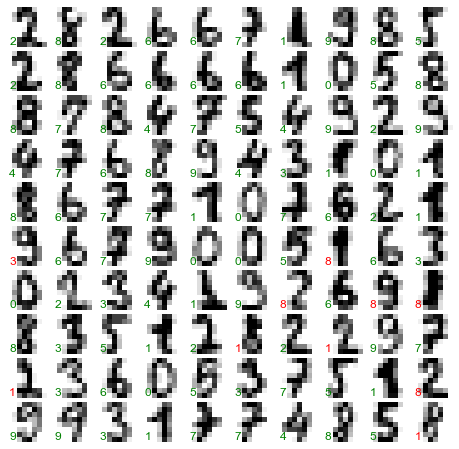

In [32]:
# 也可以比较显式的将预测结果和预测样本画出来，用颜色标记是否正确
fig,axes = plt.subplots(10,10,figsize = (8,8),
                       subplot_kw = {'xticks':[], 'yticks':[]},
                       gridspec_kw = dict(hspace=0.1,wspace=0.1))
test_images=Xtest.reshape(-1,8,8)

for i,ax in enumerate(axes.flat): ## 多维axes 展开
    ax.imshow(test_images[i], cmap = 'binary', interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
           transform = ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

要想得到更好的分类性能，可以用更复杂的算法，比如支持向量机，随机森林等。